<a href="https://colab.research.google.com/github/dominikwernerwolf/coursera/blob/main/Feedforward_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.2


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax, Conv2D, MaxPooling2D

#### Build a feedforward neural network model

In [3]:
# Build the Sequential feedforward neural network model

model = Sequential([
    Flatten(input_shape=(28,28), name='input'),
    Dense(16, activation='tanh', name='barn1'),
    Dense(16, activation='sigmoid', name='barn2'),
    Dense(16, activation='relu', name='barn3'),
    Dense(10, activation='softmax', name='output')
])

In [4]:
# Print the model summary

#model.weights
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Flatten)             (None, 784)               0         
                                                                 
 barn1 (Dense)               (None, 16)                12560     
                                                                 
 barn2 (Dense)               (None, 16)                272       
                                                                 
 barn3 (Dense)               (None, 16)                272       
                                                                 
 output (Dense)              (None, 10)                170       
                                                                 
Total params: 13,274
Trainable params: 13,274
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [11]:
# Build the Sequential convolutional neural network model

model = Sequential([
    Conv2D(16, (3,3), strides=1, activation='relu', input_shape=(28,28,1), data_format='channels_last'),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10, activation='softmax')
])

In [12]:
# Print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                10250     
                                                                 
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [13]:
from tensorflow.python.ops.special_math_ops import opt_einsum
# Define the model optimizer, loss function and metrics

opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model.compile(optimizer=opt, 
              loss='sparse_categorical_crossentropy', 
              metrics=[acc, mae])

In [9]:
# Print the resulting model attributes

print(model.loss)
print(model.optimizer)
print(model.metrics)
print(model.optimizer.lr)

sparse_categorical_crossentropy
[]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>


***
<a id="coding_tutorial_4"></a>
## The fit method

In [10]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [18]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [19]:
# Print the shape of the training data
train_images.shape

(60000, 28, 28)

In [21]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]
print(train_labels[0])

9


In [24]:
# Rescale the image values so that they lie in between 0 and 1.

train_images = train_images / 255.
test_images = test_images / 255.

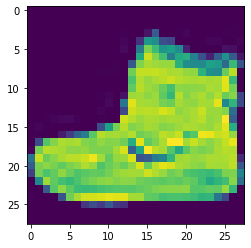

In [25]:
# Display one of the images

plt.imshow(train_images[0,:,:])

#### Fit the model

In [27]:
# Fit the model

history = model.fit(train_images[...,np.newaxis], train_labels, epochs=8, batch_size=256, verbose=2)

Epoch 1/8
235/235 - 11s - loss: 0.7005 - sparse_categorical_accuracy: 0.7495 - mean_absolute_error: 4.4200 - 11s/epoch - 47ms/step
Epoch 2/8
235/235 - 11s - loss: 0.6391 - sparse_categorical_accuracy: 0.7706 - mean_absolute_error: 4.4200 - 11s/epoch - 47ms/step
Epoch 3/8
235/235 - 11s - loss: 0.5997 - sparse_categorical_accuracy: 0.7850 - mean_absolute_error: 4.4200 - 11s/epoch - 47ms/step
Epoch 4/8
235/235 - 11s - loss: 0.5704 - sparse_categorical_accuracy: 0.7946 - mean_absolute_error: 4.4200 - 11s/epoch - 47ms/step
Epoch 5/8
235/235 - 11s - loss: 0.5485 - sparse_categorical_accuracy: 0.8044 - mean_absolute_error: 4.4200 - 11s/epoch - 47ms/step
Epoch 6/8
235/235 - 13s - loss: 0.5327 - sparse_categorical_accuracy: 0.8099 - mean_absolute_error: 4.4200 - 13s/epoch - 54ms/step
Epoch 7/8
235/235 - 11s - loss: 0.5200 - sparse_categorical_accuracy: 0.8142 - mean_absolute_error: 4.4200 - 11s/epoch - 47ms/step
Epoch 8/8
235/235 - 11s - loss: 0.5083 - sparse_categorical_accuracy: 0.8189 - mean

#### Plot training history

In [29]:
# Load the history into a pandas Dataframe

df = pd.DataFrame(history.history)
df.head()

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.700528,0.749517,4.419999
1,0.639093,0.770567,4.420001
2,0.599662,0.785000,4.420001
3,0.570443,0.794617,4.420000
4,0.548482,0.804433,4.420001


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epoche')]

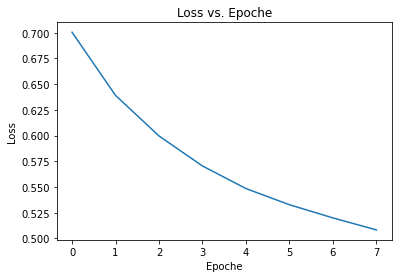

In [30]:
# Make a plot for the loss

loss_plot = df.plot(y='loss', title='Loss vs. Epoche', legend=False)
loss_plot.set(xlabel="Epoche", ylabel="Loss")

In [ ]:
# Make a plot for the accuracy



In [ ]:
# Make a plot for the additional metric



***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [ ]:
# Evaluate the model



#### Make predictions from the model

In [ ]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [ ]:
# Get the model predictions

